### Data Feature Extractor
In this document we will read in our data set:
* read in our cached normalized npy dataset files
* make a MFCC variant of the X data and a MEL-scale variant
* normalize the data and save as a cached npy file


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import helper
import os
import math 

# reproducibility
np.random.seed(42)

### Dataset Read In
In this section we will read in our data set structure which is located in our home holder

```
root:
    kaggle_2018_dataset:
        train:
            wav files for training only, contains catalog.csv
        test:
            wav files for testing our model, contains catalog.csv
        data:
            npy files, feature extraction MFCC and MEL-SPEC
        models:
            trained models
```

In [2]:
# data set root
dataset_root_dir = os.path.join("/home/charlesedwards/Documents", 'kaggle_2018_dataset')

# get the train and test data directories
train_dir = os.path.join(dataset_root_dir, 'train')
test_dir = os.path.join(dataset_root_dir, 'test')

# get the catalog.csv for train and test directories
train_catalog_csv = os.path.join(train_dir, 'catalog.csv')
test_catalog_csv = os.path.join(test_dir, 'catalog.csv')

# read the catalog.csv files
train_metadata = pd.read_csv(train_catalog_csv)
test_metadata = pd.read_csv(test_catalog_csv)
metadata = pd.concat([train_metadata, test_metadata])

# the cached feature extraction data root folder
data_npy_folder = os.path.join(dataset_root_dir, 'data')

SAMPLE_RATE = 44100

In [3]:
# load in pre-processed normalized audio data
X = np.load( os.path.join(data_npy_folder, "X-normalized_audio_data.npy" ))
y = np.load( os.path.join(data_npy_folder, "y-normalized_audio_data.npy" ))


### Data Visualization 1/3
Visualize the cached data, in this section generate **STFT** spectrograms to db/log scale

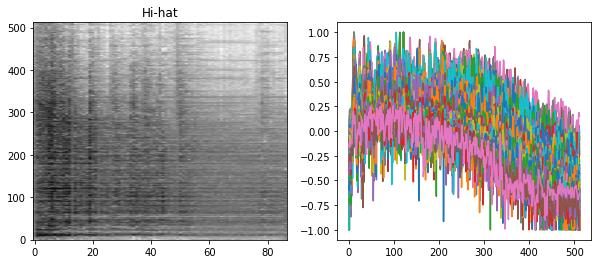

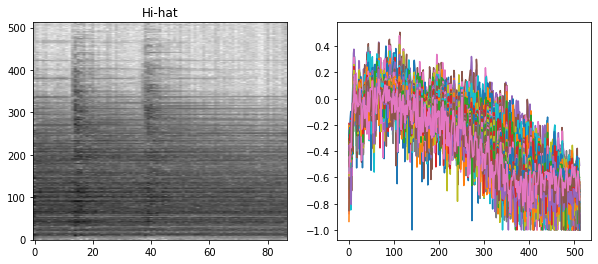

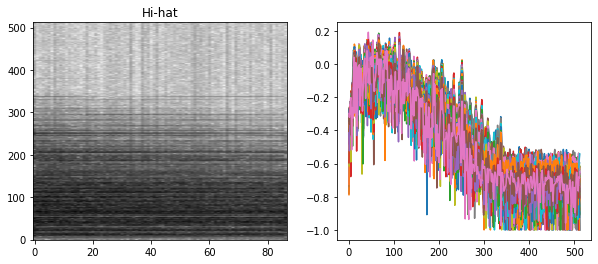

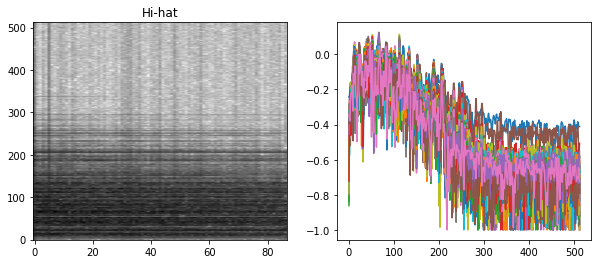

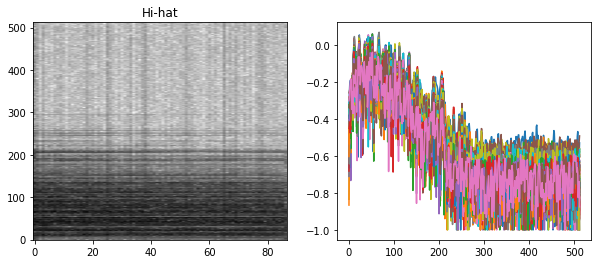

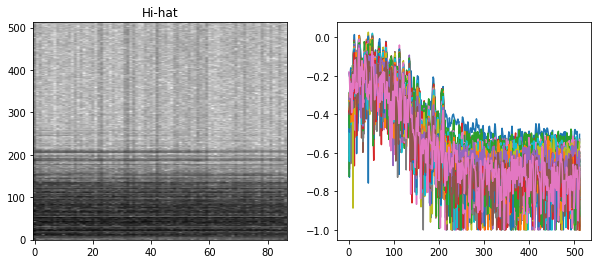

In [4]:
for i in range(6):

    stft = helper.extract_audio_feature(X[i], sr=SAMPLE_RATE, feature_type='stft', use_amplitude_to_db=False)

    # display the spectrogram and data side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(stft, aspect='auto', origin='lower', cmap='gray_r')
    plt.title(y[i])
    plt.subplot(1, 2, 2)
    plt.plot(stft)
    plt.show()

### Data Visualization 2/3
Display 6 audio **MFCCs** of the cached data,
Mel-frequency cepstral coefficients

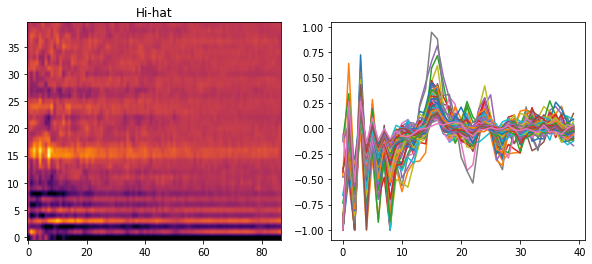

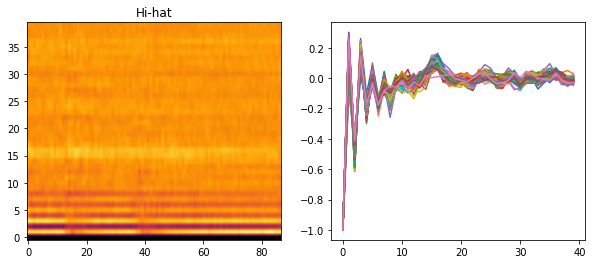

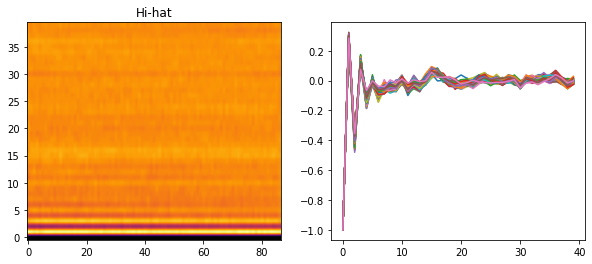

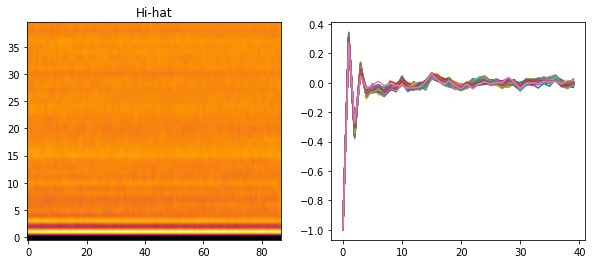

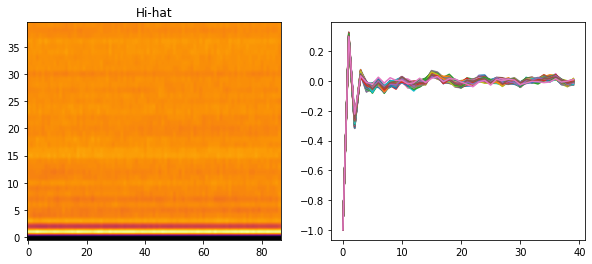

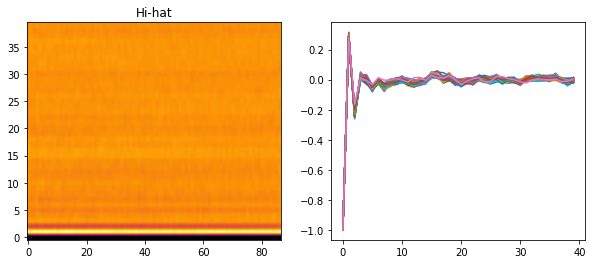

In [5]:
# display 6 random MFCCS
for i in range(6):

    mfcc = helper.extract_audio_feature(X[i], sr=SAMPLE_RATE, feature_type='mfcc', use_amplitude_to_db=False)

    # display the spectrogram and data side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(mfcc, aspect='auto', origin='lower', cmap="inferno")
    plt.title(y[i])
    plt.subplot(1, 2, 2)
    plt.plot(mfcc)
    plt.show()

### Data Visualization 3/3
Display 6 audio **MEL-Spectrogram** of the cached data

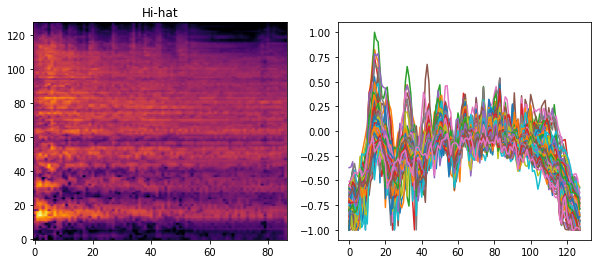

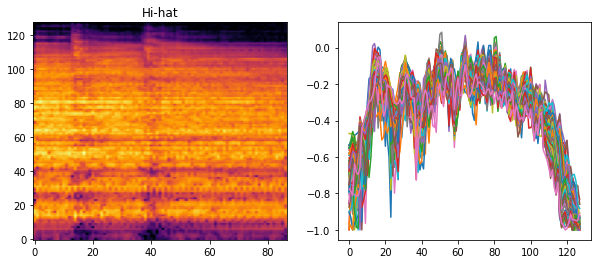

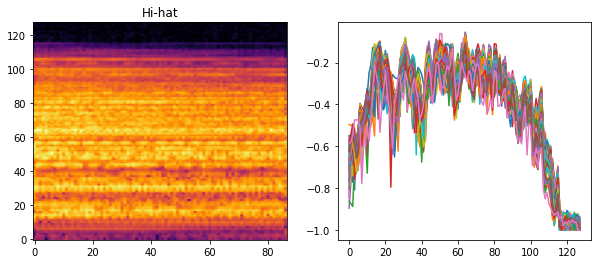

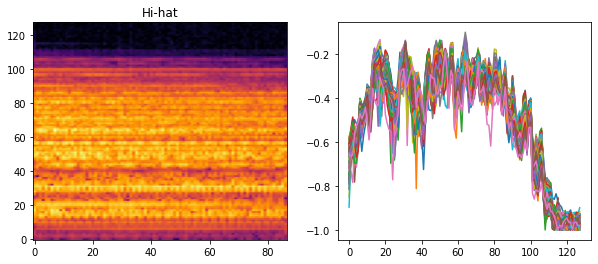

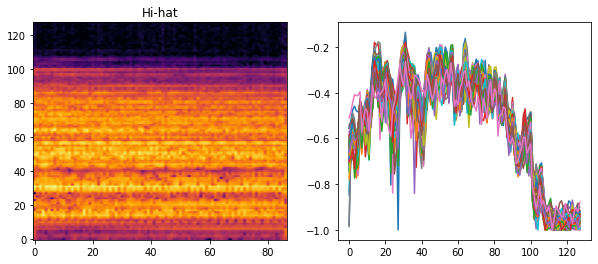

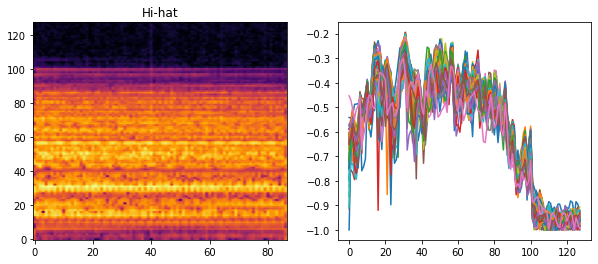

In [6]:
# display 6 random MEL spectrograms
for i in range(6):

    mel = helper.extract_audio_feature(X[i], sr=SAMPLE_RATE, feature_type='mel', use_amplitude_to_db=False)

    # display the spectrogram and data side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(mel, aspect='auto', origin='lower', cmap="inferno")
    plt.title(y[i])
    plt.subplot(1, 2, 2)
    plt.plot(mel)
    plt.show()

### Extract FEATURE

In [7]:
FEATURE_TO_EXTRACT = "mfcc"#'mel'

In [8]:
# what this code will do is take the read in audio data and replace existing audio in memory with
# extracted feature instead and will save the new data to a new numpy file
print(f"Extracting audio features... (REPLACING X WITH {FEATURE_TO_EXTRACT})")
counter = 0
features = []
for x, x_data in enumerate(X):

    # extract the audio feature
    f_data = helper.extract_audio_feature(x_data, sr=SAMPLE_RATE, feature_type=FEATURE_TO_EXTRACT, use_amplitude_to_db=False, n_mfcc=87)

    features.append(f_data)

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(x+1, len(X)))
        counter = 0

    counter += 1

print("Saving new X data to numpy file...")
np.save(os.path.join(data_npy_folder, f"X-{FEATURE_TO_EXTRACT}87_audio_data.npy"), np.array(features))
print("Done!")


Extracting audio features... (REPLACING X WITH mfcc)
Status: 501/69067
Status: 1001/69067
Status: 1501/69067
Status: 2001/69067
Status: 2501/69067
Status: 3001/69067
Status: 3501/69067
Status: 4001/69067
Status: 4501/69067
Status: 5001/69067
Status: 5501/69067
Status: 6001/69067
Status: 6501/69067
Status: 7001/69067
Status: 7501/69067
Status: 8001/69067
Status: 8501/69067
Status: 9001/69067
Status: 9501/69067
Status: 10001/69067
Status: 10501/69067
Status: 11001/69067
Status: 11501/69067
Status: 12001/69067
Status: 12501/69067
Status: 13001/69067
Status: 13501/69067
Status: 14001/69067
Status: 14501/69067
Status: 15001/69067
Status: 15501/69067
Status: 16001/69067
Status: 16501/69067
Status: 17001/69067
Status: 17501/69067
Status: 18001/69067
Status: 18501/69067
Status: 19001/69067
Status: 19501/69067
Status: 20001/69067
Status: 20501/69067
Status: 21001/69067
Status: 21501/69067
Status: 22001/69067
Status: 22501/69067
Status: 23001/69067
Status: 23501/69067
Status: 24001/69067
Status: